In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
np.random.rand()


0.6964691855978616

In [4]:
def individual(popSize):
    return list(np.random.choice([0,1],popSize))

In [5]:
chromo=individual(5)

In [6]:
print(chromo)

[0, 0, 0, 0, 0]


In [7]:
def population (popSize,chromLeng):
    return [individual(popSize) for x in range(chromLeng)]

In [8]:
pop= population(4,20)
print(pop)

[[1, 1, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [0, 0, 0, 1], [1, 1, 0, 1], [0, 0, 0, 0], [1, 1, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 0, 0, 1], [0, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 1, 0]]


In [9]:
def pop_fitness(pop):
    count = []
    for i in range(len(pop)):
        count.append(np.count_nonzero(pop[i]))
    return count

In [10]:
fitness=pop_fitness(pop)
print(fitness)

[3, 2, 3, 1, 3, 0, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1, 4, 0, 2, 1]


In [11]:
def evaRF (fitness):
    rfProb=[]
    sumOfFitness=0
    for i in range(len(fitness)):
        sumOfFitness+= fitness[i]
    for i in range(len(fitness)):
        rfProb.append(fitness[i]/sumOfFitness)
    return rfProb

In [12]:
Rf=evaRF(fitness)
print(Rf)

[0.08333333333333333, 0.05555555555555555, 0.08333333333333333, 0.027777777777777776, 0.08333333333333333, 0.0, 0.08333333333333333, 0.027777777777777776, 0.05555555555555555, 0.08333333333333333, 0.027777777777777776, 0.05555555555555555, 0.027777777777777776, 0.05555555555555555, 0.027777777777777776, 0.027777777777777776, 0.1111111111111111, 0.0, 0.05555555555555555, 0.027777777777777776]


In [13]:
def com(Rf):
    com_dist =[]
    count = 0
    for i in range(len(Rf)):
        if i==0:
            com_dist.append(Rf[i])
        else:
            count = Rf[i]+com_dist[i-1]
            com_dist.append(count)
    return com_dist

In [14]:
comDist=com(Rf)
print(comDist)

[0.08333333333333333, 0.1388888888888889, 0.2222222222222222, 0.25, 0.3333333333333333, 0.3333333333333333, 0.41666666666666663, 0.4444444444444444, 0.5, 0.5833333333333334, 0.6111111111111112, 0.6666666666666667, 0.6944444444444445, 0.7500000000000001, 0.7777777777777779, 0.8055555555555557, 0.9166666666666667, 0.9166666666666667, 0.9722222222222223, 1.0]


In [15]:
def selection(comDist,Individuals):
    #print(randVar)
    selected=[]
    for i in range(len(comDist)):
        randVar=np.random.rand()
        for x in range(len(comDist)):
                if comDist[x] >= randVar:
                    selected.append(Individuals[x])
                    break
                else:
                    continue
                    
    return selected

In [16]:
selectedIndv = selection(comDist,pop)
print(selectedIndv)

[[0, 1, 0, 0], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 0, 1], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [0, 1, 0, 0], [1, 1, 1, 1], [1, 1, 0, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 1, 0, 1]]


In [17]:
def CrossOver(selectedIndv,popsize,probCrossOver=0.6):
    newPop=[]
    for i in  range(0,np.shape(selectedIndv)[0],2):   
        if i>=len(selectedIndv)-1:
            break
        randVar= np.random.rand()
        s=i
        indv1=selectedIndv[s]
        indv2=selectedIndv[s+1]
        if randVar<probCrossOver:
            offSpr1=[]
            offSpr2=[]
            cutPiont=abs(np.round(np.random.rand()*popsize-1))
            for j in range(0,popsize-1):
                if j==cutPiont:
                    for x in range(j,popsize):
                        offSpr1.append(indv2[x])
                        offSpr2.append(indv1[x])
                    break
                else:
                    offSpr1.append(indv1[j])
                    offSpr2.append(indv2[j])
            
            newPop.append(offSpr1)
            newPop.append(offSpr2)
        else:
            
            newPop.append(indv1)
            newPop.append(indv2)

    return newPop


In [18]:
newpop=CrossOver(selectedIndv,4,0.6)
print(newpop)

[[1, 1, 0, 0], [0, 1, 0, 0], [1, 0, 1], [1, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 1, 0], [1, 0, 0, 0], [0, 1, 0], [1, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 1, 1, 1]]


In [19]:
def Mutation(newPop,popsize,probMut=0.05):
    mutPop=[]
    for i in range(len(newPop)):
        indv=newPop[i]
        for j in range(0,popsize-1):
            randVar= np.random.rand()
            if randVar<probMut:
                if indv[j]==0:
                    indv[j]=1
                else:
                    indv[j]=0
            else:
                continue
        mutPop.append(indv)
    return mutPop

In [20]:
MutatedPopulation= Mutation(newpop,4)

In [21]:
print(MutatedPopulation)

[[1, 1, 0, 0], [0, 1, 0, 0], [1, 0, 1], [1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 1], [1, 1, 1, 0], [1, 0, 0, 0], [0, 1, 0], [1, 1, 0], [0, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1]]


In [22]:
def elitism(fitness,pop):
    maxfit=0
    bestPop=[]
    for j in range(0,2,1):
        maxfit=max(fitness)
        for i in range(len(fitness)):
            if maxfit==fitness[i]:
                bestPop.append(pop[i]) 
                pop.remove(pop[i])
                fitness.remove(fitness[i])   
                break
            else:
                    continue
         
    return bestPop
    





def GA(popSize,numOfGeneration,chromLeng,probCrossOver=0.6,probMut=0.05):
    FinalPop=[]
    best_hist=[]
    for i in range(0,numOfGeneration):
        #pop= population(4,20)[0,0,0,0]
        Pop=population(chromLeng,popSize)
        #print(Pop)
        fitness=pop_fitness(Pop)
        best=max(fitness)
        for i in range(len(fitness)):
            if best==fitness[i]:
                best_hist.append(fitness[i]) 
                break
        el=elitism(fitness,Pop)
        #print(fitness)
        RF = evaRF (fitness)
        #print(RF)
        comDist=com(RF)
        #print(comDist)
        selectedIndv = selection(comDist,Pop)
        #print(selectedIndv)
        newPopulation= CrossOver(selectedIndv,chromLeng,probCrossOver)
        #print(newPopulation)
        MutatedPopulation= Mutation(newPopulation,chromLeng,probMut)
        MutatedPopulation.append(el)
        FinalPop.append(MutatedPopulation)
    return FinalPop, best_hist

In [23]:

runGA = GA(20,100,10)
print(runGA[0])

[[[1, 0, 0, 0, 0, 1, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0], [1, 1, 0, 1, 1, 1, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], [1, 0, 0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 0, 0, 0, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 0, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 1, 1, 0, 1], [0, 0, 0, 1, 1, 1, 0, 1, 1, 0], [0, 0, 1, 1, 1, 1, 0, 1, 1, 0], [1, 0, 0, 1, 1, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 0, 0, 1, 1], [1, 0, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 0, 0, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0, 0, 1, 0, 1], [[1, 1, 0, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 1, 0, 1, 1, 1, 1]]], [[0, 0, 1, 1, 1, 0, 1, 0, 1, 0], [0, 0, 1, 1, 1, 0, 1, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 1], [1, 1, 0, 0, 1, 1, 0, 1, 1, 0], [0, 0, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 0, 1, 1, 0, 1, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 1], [0, 0, 1, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 1, 1, 0, 1, 1], [0, 1, 1, 1, 0, 0, 0, 1, 1, 1], [0

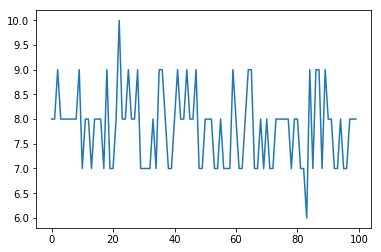

In [24]:

plt.plot(runGA[1])

